In [1]:
from dqn_agent import DQN
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
names=[] # keep track of names for plotting at the end


# basic parameters
p = dict(
    env_name =          'Breakout', # defaults to NoFrameskip-v4 version
    log_dir=            'Breakout_tests',
    overwrite_previous= False,
    asynchronous=       False,
    
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    
    screen_size=        42
    trailing_avg_trail= 40,
    eval_interval=      100_000,
    max_steps=          15_000_000, 
    record_interval=    5_000_000, 
    n_games_per_eval=   10,
    n_envs=             16,
    pbar_update_interval= 800,
    seed=               42
    )


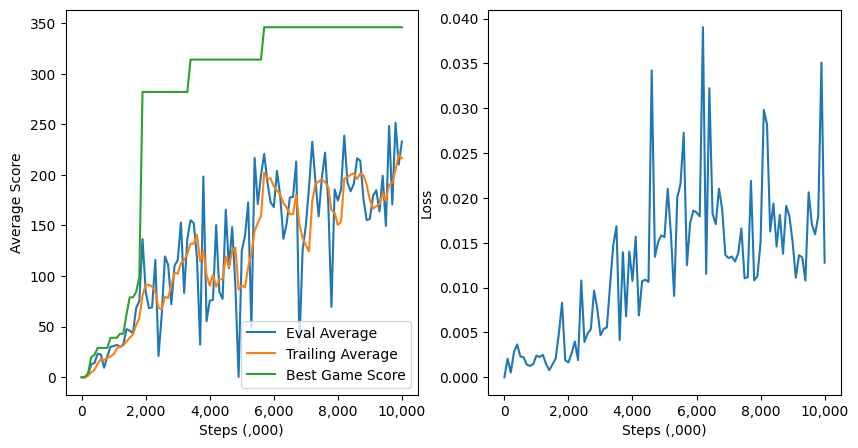

steps=10000000, episodes=62350
Best Score: 346.0
Trailing Avg (last 20): 216.4
Time elapsed: 2:31:56


steps:100%|███████████|10,000,000/10,000,000[t:2:31:56/00:00], eps=62,350, ev_avg=210.2, tr_avg=220.2, rate=1097.7 stp/s


In [2]:
p.update(
    name=               'DDQN',
    note=               '''16 vectorized environments. ''',

    doubleQ=            True,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)

dqn.train()
names.append(dqn.filepaths.sub_dir)


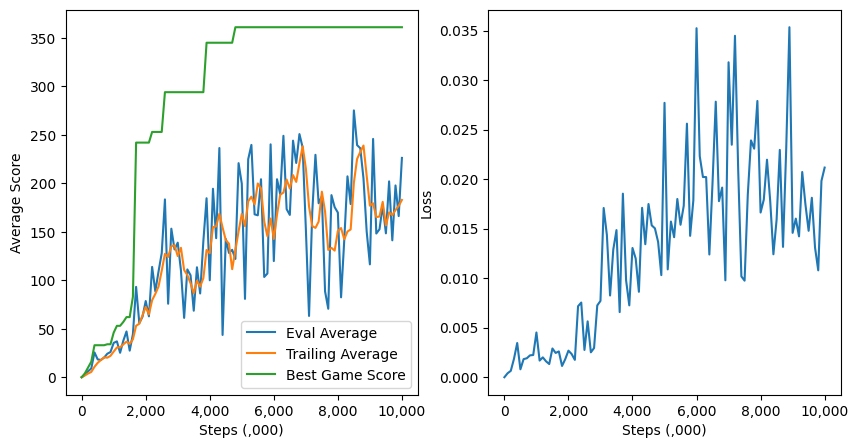

steps=10000000, episodes=62131
Best Score: 361.0
Trailing Avg (last 20): 182.85
Time elapsed: 2:27:16


steps:100%|███████████|10,000,000/10,000,000[t:2:27:15/00:00], eps=62,131, ev_avg=166.2, tr_avg=176.8, rate=1132.5 stp/s


In [7]:
''' Vanilla DQN'''

p.update(
    name=               'DQN',
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)


In [ ]:
''' Rainbow DQN'''

p.update(
    name=               'Rainbow',
    doubleQ=            True,
    dueling=            True,
    noisy_linear=       True,
    categorical_DQN=    True,
    prioritized_replay= True,
    n_step_learning=    True,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)



['logs/Breakout_tests/DDQN', 'logs/Breakout_tests/DQN']
Looking for logs/Breakout_tests/DDQN/DDQN.csv
Looking for logs/Breakout_tests/DQN/DQN.csv


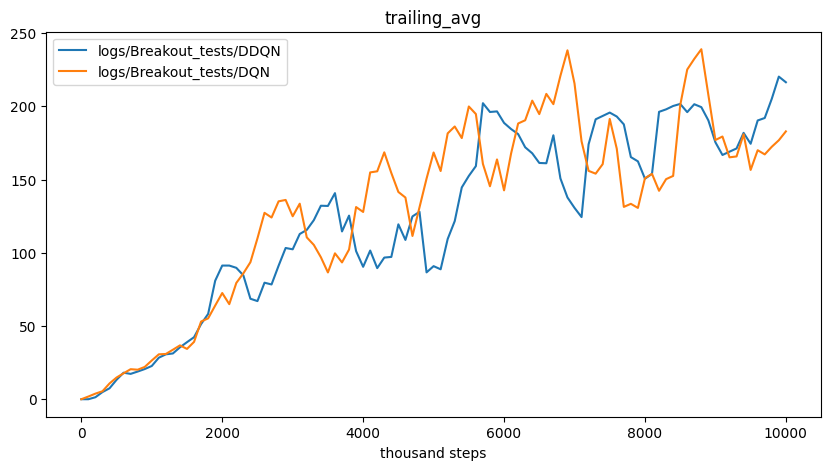

       steps  logs/Breakout_tests/DDQN  logs/Breakout_tests/DQN
0        0.0                  0.000000                 0.000000
1      100.0                  0.000000                 1.833333
2      200.0                  1.363636                 3.818182
3      300.0                  4.875000                 5.437500
4      400.0                  7.450000                10.750000
..       ...                       ...                      ...
96    9600.0                190.300000               170.000000
97    9700.0                192.000000               167.150000
98    9800.0                205.100000               172.350000
99    9900.0                220.250000               176.800000
100  10000.0                216.400000               182.850000

[101 rows x 3 columns]


In [14]:
# plot all the results in the log folder
import importlib, os
import modules.utils
importlib.reload(modules.utils)
plot = modules.utils.plot_multiple_results

col = 'trailing_avg'; assert col in ['best_score','eval_avg','trailing_avg','loss']
plot( names, 'trailing_avg')
